In [2]:
import numpy as np
import matplotlib.pyplot as plt
from math import exp

T(10) for shot 1 is = 110.03036171698542
T(10) for shot 2 is = 286.7576474069151
Exact value of T0 is = 200.000050095194
Exact value of z0 is = 12.636315583100867


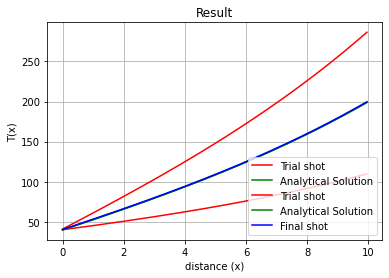

In [3]:
#Shooting Method
def f(x,T):
    return 0.01*(T-20)

def exact(x):
    return 73.4523*exp(0.1*x) - 53.4523*exp(-0.1*x) + 20

def rk4_iter(T,z,x,dx):
    k1a = f(x,T)
    k2a = f(x+dx*0.5,T+k1a*0.5*dx)
    k3a = f(x+dx*0.5,T+k2a*0.5*dx)
    k4a = f(x+dx,T+k3a*dx)
    z += dx*(k1a+2*k2a+2*k3a+k4a)/6
    k1b = z
    k2b = z + k1a*dx*0.5
    k3b = z + k2a*dx*0.5
    k4b = z + k3a*dx
    T += dx*(k1b+2*k2b+2*k3b+k4b)/6
    return T,z

def plot_result(T, z, xmax, n):
    dx = xmax/n
    x = 0.0
    allx = []
    r_exact = []
    r_rk4 = []
    
    T0 = T_rk4 = T
    z0 = z_rk4 = z

    for i in range(n):
        T = exact(x)
        T_rk4, z_rk4 = rk4_iter(T_rk4,z_rk4, x, dx)
        allx.append(x)
        r_rk4.append(T_rk4)
        r_exact.append(T)
        x += dx

    
    _plot("result.png", "Result", "distance (x)", "T(x)", allx, r_rk4, r_exact)
    
def _plot(out, title, xlabel, ylabel, allx, rk4, exact=None):
    plt.title(title)
    plt.ylabel(ylabel)
    plt.xlabel(xlabel)
    plt.plot(allx, rk4, 'r-', label="Trial shot")
    if exact:
        plt.plot(allx, exact, 'g-', label='Analytical Solution')

    plt.legend(loc=4)
    plt.grid(True)
    
def result(T, z, xmax, n):
    dx = xmax/n
    x = 0.0
    allx = []
    r_rk4 = []
    
    T0 = T_rk4 = T
    z0 = z_rk4 = z

    for i in range(n):
        T_rk4, z_rk4 = rk4_iter(T_rk4,z_rk4, x, dx)
        allx.append(x)
        r_rk4.append(T_rk4)
        x += dx
    return r_rk4

def plot_result2(T, z, xmax, n):
    dx = xmax/n
    x = 0.0
    allx = []
    r_exact = []
    r_rk4 = []
    
    T0 = T_rk4 = T
    z0 = z_rk4 = z

    for i in range(n):
        T = exact(x)
        T_rk4, z_rk4 = rk4_iter(T_rk4,z_rk4, x, dx)
        allx.append(x)
        r_rk4.append(T_rk4)
        r_exact.append(T)
        x += dx

    
    _plot2("result.png", "Result", "distance (x)", "T(x)", allx, r_rk4, r_exact)
    
def _plot2(out, title, xlabel, ylabel, allx, rk4, exact=None):
    plt.title(title)
    plt.ylabel(ylabel)
    plt.xlabel(xlabel)
    plt.plot(allx, rk4, 'b-', label="Final shot")
    
    plt.legend(loc=4)
    plt.grid(True)    

T0 = 40
z01 = 5
z02 = 20
xmax = 10.0
n = 100
T10_1 = result(T0, z01, xmax, n)
T10_2 = result(T0,z02,xmax,n)
T10_exact = exact(xmax)
plot_result(T0, z01, xmax, n*2)
plot_result(T0, z02, xmax, n*2)
print("T(10) for shot 1 is =", T10_1[99])
print("T(10) for shot 2 is =", T10_2[99])
print("Exact value of T0 is =", T10_exact)

#Using linear interpolation
z0 = z01 + ((z02 - z01)/(T10_2[99]-T10_1[99]))*(T10_exact-T10_1[99])
print("Exact value of z0 is =", z0)
plot_result2(T0, z0, xmax, n*2)



[[ 2.00009803 -1.          0.         ...  0.          0.
   0.        ]
 [-1.          2.00009803 -1.         ...  0.          0.
   0.        ]
 [ 0.         -1.          2.00009803 ...  0.          0.
   0.        ]
 ...
 [ 0.          0.          0.         ...  2.00009803 -1.
   0.        ]
 [ 0.          0.          0.         ... -1.          2.00009803
  -1.        ]
 [ 0.          0.          0.         ...  0.         -1.
   2.00009803]]
[4.00019606e+01 1.96059210e-03 1.96059210e-03 1.96059210e-03
 1.96059210e-03 1.96059210e-03 1.96059210e-03 1.96059210e-03
 1.96059210e-03 1.96059210e-03 1.96059210e-03 1.96059210e-03
 1.96059210e-03 1.96059210e-03 1.96059210e-03 1.96059210e-03
 1.96059210e-03 1.96059210e-03 1.96059210e-03 1.96059210e-03
 1.96059210e-03 1.96059210e-03 1.96059210e-03 1.96059210e-03
 1.96059210e-03 1.96059210e-03 1.96059210e-03 1.96059210e-03
 1.96059210e-03 1.96059210e-03 1.96059210e-03 1.96059210e-03
 1.96059210e-03 1.96059210e-03 1.96059210e-03 1.96059210e-03

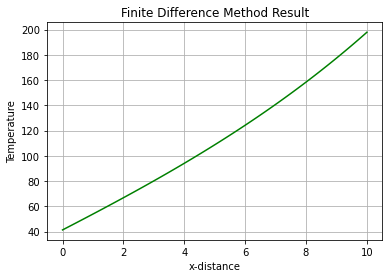

In [4]:
#Finite Difference Method

def matrix1(n):
    dx = 10/(n+1)
    x = (2+0.01*dx*dx)*(np.identity(n))
    y = np.zeros((n,n))
    j = 1
    for i in range(0, n-1):
        y[i][j] = -1
        j += 1
    M = x + y + np.transpose(y)
    return M

A = matrix1(100)

def matrix2(n):
    dx = 10/(n+1)
    N = np.zeros(n)
    N[1:n-1] = 0.2*dx**2
    N[n-1] = 200+0.2*dx**2
    N[0] = 40+0.2*dx**2
    return N

B = matrix2(100)
print(A)
print(B)

T = np.linalg.solve(A, B)
#LU Decomposition
m = len(A)
U = np.zeros((m, m), dtype = np.double)
L = np.eye(m, dtype = np.double)        
for i in range(m):
    for j in range(i+1):
        s1 = sum(U[k][i] * L[j][k] for k in range(j))
        U[j][i] = A[j][i] - s1
        
    for j in range(i, m):
        s2 = sum(U[k][i] * L[j][k] for k in range(j))
        L[j][i] = (A[j][i] - s2) / U[i][i]
        
y = np.zeros(m)
Temp = np.zeros(m)


for i in range(n):
    t1 = B[i]
    for j in range(i):
        t1 = t1 - L[i][j] * y[j]
    y[i] = t1 / L[i][i]
    

for k in range(n-1, -1, -1):
    t2 = y[k]
    for l in range(k+1, n):
        t2 = t2 - U[k][l] * Temp[l]
    Temp[k] = t2 / U[k][k]
    
print(Temp[99])


print(T[99])

x = np.linspace(0, 10, 100)
plt.title("Finite Difference Method Result")
plt.ylabel("Temperature")
plt.xlabel("x-distance")
#plt.plot(x,T, 'c-')
plt.plot(x,Temp, 'g-')
plt.grid(True) 

    